# New York City Airbnb Open Data


In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ahirsarthak/KDD-Project/main/AB_NYC_2019.csv')
df.shape

(48895, 16)

#### Exploring data analytics

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.shape

(48895, 16)

There are no duplicates in this dataset

In [9]:
print("\n",df['host_id'].nunique())
print("\n",df['host_id'].unique())
print("\n",df['host_id'].value_counts().head())


 37457

 [     2787      2845      4632 ... 274321313  23492952  68119814]

 219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
Name: host_id, dtype: int64


"219517861" host_id is the busiest one with 327 times he attended a guest. His name is "Sonder (NYC)" in neighbourhood_group "Manhattan".

In [10]:
print("\n",df['neighbourhood_group'].nunique())
print("\n",df['neighbourhood_group'].unique())
print("\n",df['neighbourhood_group'].value_counts())


 5

 ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']

 Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


In [11]:
print("\n",df['room_type'].nunique())
print("\n",df['room_type'].unique())
print("\n",df['room_type'].value_counts())


 3

 ['Private room' 'Entire home/apt' 'Shared room']

 Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


In [12]:
df.groupby("neighbourhood_group")["host_id"].count()

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: host_id, dtype: int64

we have maximum number of hosts in Manhattan region, and minimum number in Staten Island

In [13]:
df.groupby("room_type")["price"].sum()

room_type
Entire home/apt    5381480
Private room       2004450
Shared room          81348
Name: price, dtype: int64

In [14]:
df.groupby("room_type")["number_of_reviews"].sum()

room_type
Entire home/apt    580403
Private room       538346
Shared room         19256
Name: number_of_reviews, dtype: int64

maximum number of reviews come from room_type : Entire home/apt or Private room

In [15]:
df.groupby("neighbourhood_group")["room_type"].value_counts()

neighbourhood_group  room_type      
Bronx                Private room         652
                     Entire home/apt      379
                     Shared room           60
Brooklyn             Private room       10132
                     Entire home/apt     9559
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Private room        3372
                     Entire home/apt     2096
                     Shared room          198
Staten Island        Private room         188
                     Entire home/apt      176
                     Shared room            9
Name: room_type, dtype: int64

There are maximum of room_type("Entire home/apt") nearby region "Manhattan"

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


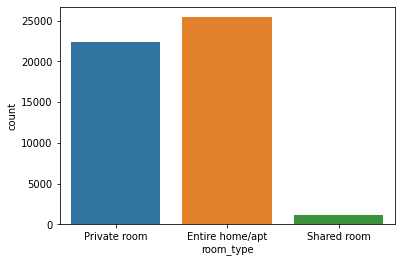

In [16]:
sns.countplot(df['room_type'])

# Count plot for neighbourhood_group.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


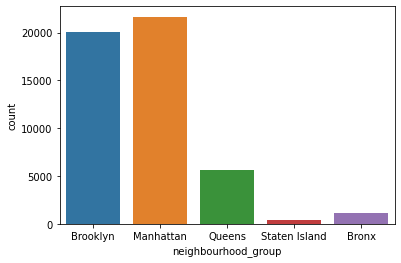

In [17]:
sns.countplot(df['neighbourhood_group'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


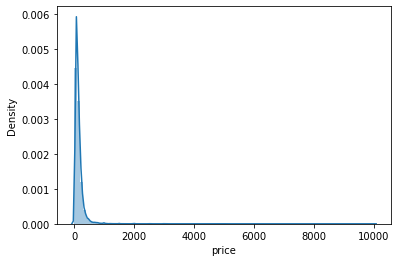

In [18]:
sns.distplot(df['price'], bins = 100)

In [19]:
for i in range(1,11):
  print("Number of nights: ",i)
  print("Amount of trasactions:",len(df[df['minimum_nights'] == i]))

Number of nights:  1
Amount of trasactions: 12720
Number of nights:  2
Amount of trasactions: 11696
Number of nights:  3
Amount of trasactions: 7999
Number of nights:  4
Amount of trasactions: 3303
Number of nights:  5
Amount of trasactions: 3034
Number of nights:  6
Amount of trasactions: 752
Number of nights:  7
Amount of trasactions: 2058
Number of nights:  8
Amount of trasactions: 130
Number of nights:  9
Amount of trasactions: 80
Number of nights:  10
Amount of trasactions: 483


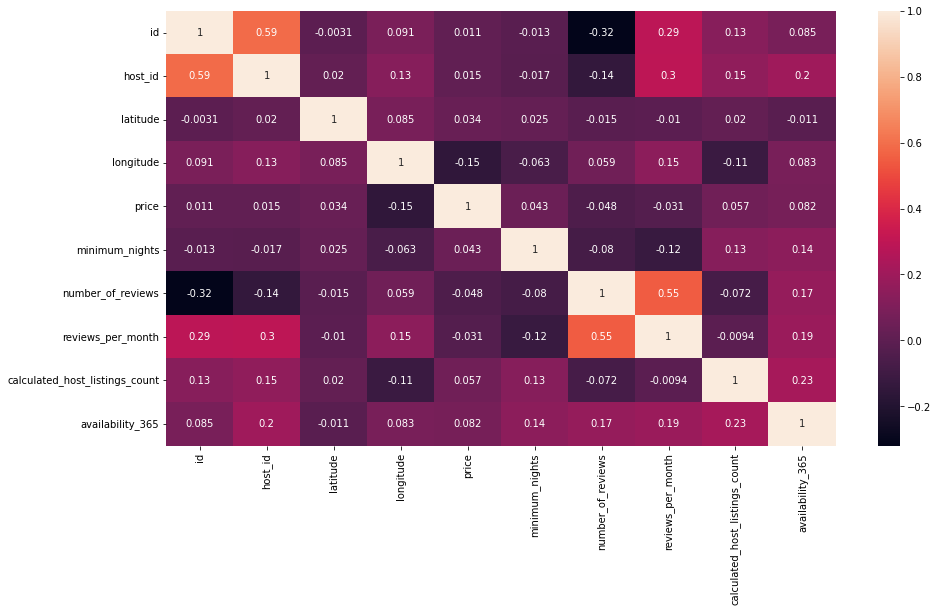

In [20]:
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


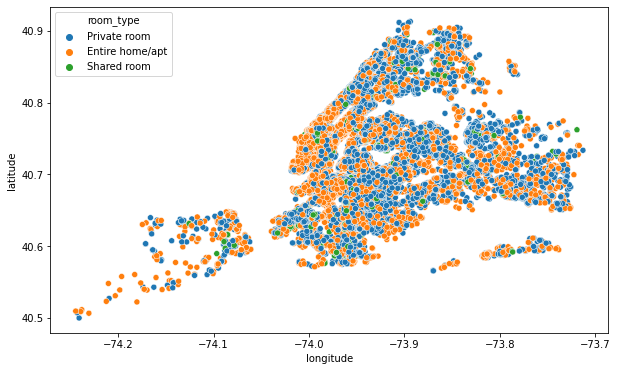

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.room_type)

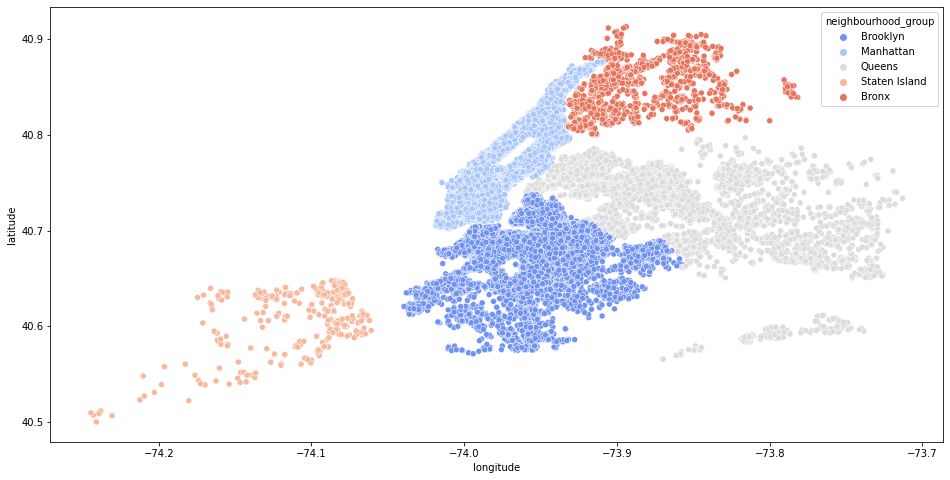

In [22]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=df.latitude,x=df.longitude,hue=df.neighbourhood_group,palette="coolwarm")
plt.show()

Latitude and Longitude with room availablity for 365 days

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


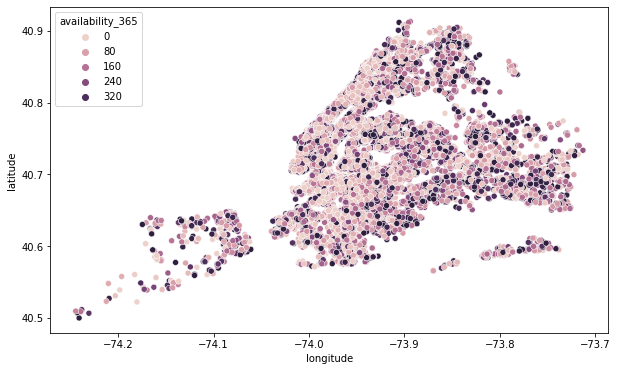

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.availability_365)

# Observation
From the output above we can observe that Brooklyn and Manhattan have more number of AirBnB's in New York City 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


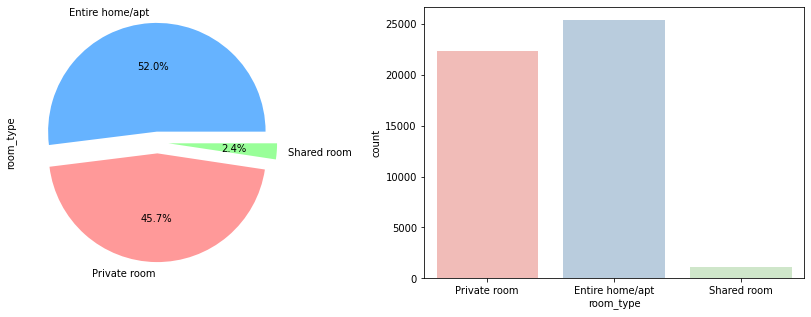

In [24]:
f,ax = plt.subplots(1,2,figsize=(15,5))
df.room_type.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],colors = ['#66b3ff','#ff9999','#99ff99'])
ax = sns.countplot(df.room_type,palette="Pastel1")
plt.show()

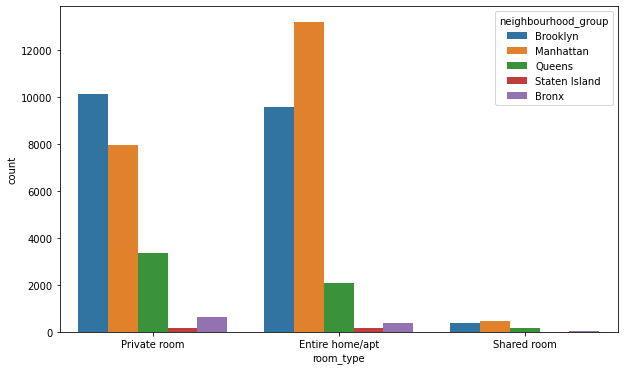

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'room_type', hue = 'neighbourhood_group')

Home service seems to be most used by people and the highest in Manhattan. This is also the highest service used across New York City.
In Brooklyn, Private rooms were more used.

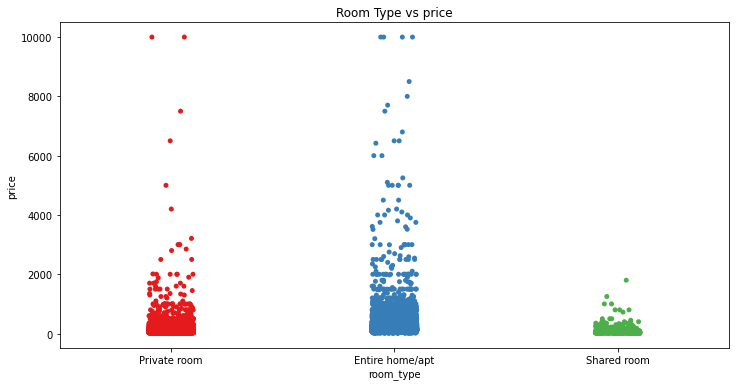

In [26]:
plt.figure(figsize=(12, 6));
sns.stripplot(x="room_type",y="price",data=df,palette='Set1');
plt.title('Room Type vs price');

Room types

In [27]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

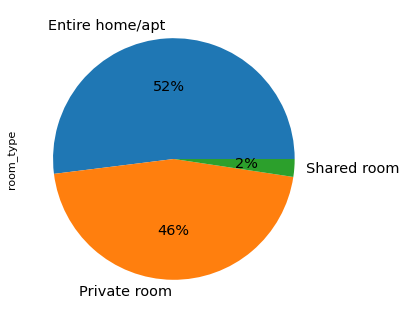

In [28]:
fig = plt.figure(figsize=(5,5), dpi=80)
df['room_type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

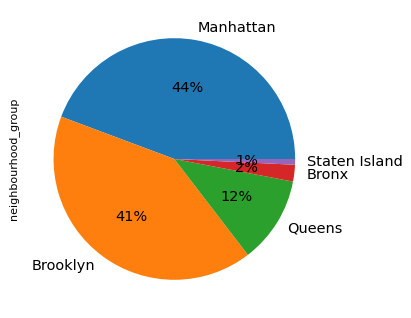

In [29]:
fig = plt.figure(figsize=(5,5), dpi=80)
df['neighbourhood_group'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

## **Neighbourhood groups price**




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


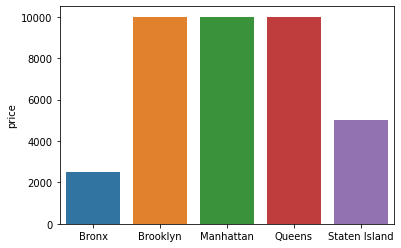

In [30]:
df['neighbourhood_group']=df['neighbourhood_group'].astype('category')

sns.barplot(df["neighbourhood_group"].cat.categories, df.groupby('neighbourhood_group')['price'].max())

## **Null Values**

In [31]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Dropping the columns 'id', 'last_review' as they are not required for future data exploration and predictions.

In [32]:
df.drop(['id','last_review'], axis=1, inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   name                            48879 non-null  object  
 1   host_id                         48895 non-null  int64   
 2   host_name                       48874 non-null  object  
 3   neighbourhood_group             48895 non-null  category
 4   neighbourhood                   48895 non-null  object  
 5   latitude                        48895 non-null  float64 
 6   longitude                       48895 non-null  float64 
 7   room_type                       48895 non-null  object  
 8   price                           48895 non-null  int64   
 9   minimum_nights                  48895 non-null  int64   
 10  number_of_reviews               48895 non-null  int64   
 11  reviews_per_month               38843 non-null  float64 
 12  calculated_host_li

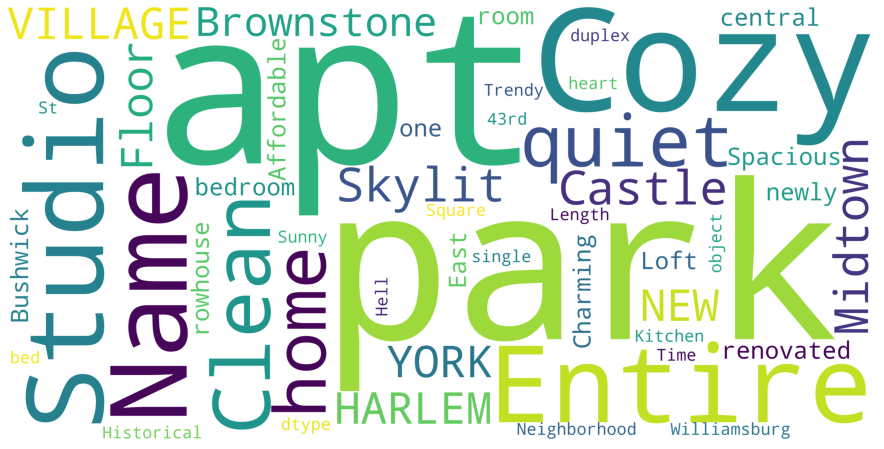

In [34]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
name_corpus = ''.join(str(df['name']))
name_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(name_corpus)
plt.figure(figsize = (16,8))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.show()

### Making of relevant dataset

In [35]:
df_new = df[["neighbourhood_group", "latitude", "longitude", "room_type", "price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count"]]
df_new.shape

(48895, 8)

In [36]:
df_new.head(3)

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,1


In [37]:
ng = pd.get_dummies(df_new['neighbourhood_group'],drop_first=True)
ng.head(3)

,Brooklyn,Manhattan,Queens,Staten Island
0,1,0,0,0
1,0,1,0,0
2,0,1,0,0


In [38]:
df_new.drop(['neighbourhood_group'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [39]:
print(df_new.shape)
df_new.head()

(48895, 7)


,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count
0,40.64749,-73.97237,Private room,149,1,9,6
1,40.75362,-73.98377,Entire home/apt,225,1,45,2
2,40.80902,-73.94190,Private room,150,3,0,1
3,40.68514,-73.95976,Entire home/apt,89,1,270,1
4,40.79851,-73.94399,Entire home/apt,80,10,9,1


In [40]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
lm = LabelEncoder()

In [41]:
df_new[["price", 'latitude', "longitude", "minimum_nights", "number_of_reviews", "calculated_host_listings_count"]] = scaler.fit_transform(df[["price", 'latitude', "longitude", "minimum_nights", "number_of_reviews", "calculated_host_listings_count"]])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [42]:
df_new.head()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count
0,-1.493849,-0.437652,Private room,-0.015493,-0.293996,-0.320414,-0.034716
1,0.452436,-0.684639,Entire home/apt,0.300974,-0.293996,0.487665,-0.156104
2,1.468399,0.222497,Private room,-0.011329,-0.196484,-0.522433,-0.186451
3,-0.803398,-0.164450,Entire home/apt,-0.265335,-0.293996,5.538156,-0.186451
4,1.275660,0.177216,Entire home/apt,-0.302811,0.144807,-0.320414,-0.186451


In [43]:
df_final = pd.concat([df_new, ng], axis = 1)

In [44]:
df_final.head()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,Brooklyn,Manhattan,Queens,Staten Island
0,-1.493849,-0.437652,Private room,-0.015493,-0.293996,-0.320414,-0.034716,1,0,0,0
1,0.452436,-0.684639,Entire home/apt,0.300974,-0.293996,0.487665,-0.156104,0,1,0,0
2,1.468399,0.222497,Private room,-0.011329,-0.196484,-0.522433,-0.186451,0,1,0,0
3,-0.803398,-0.164450,Entire home/apt,-0.265335,-0.293996,5.538156,-0.186451,1,0,0,0
4,1.275660,0.177216,Entire home/apt,-0.302811,0.144807,-0.320414,-0.186451,0,1,0,0


#### logistic regression classification


In [45]:
df_final['room_type'] = lm.fit_transform(df['room_type'])

In [46]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#### for below section column "room_type" is taken as target column 

In [47]:
x = df_final.drop("room_type", axis = 1)
y = df_final['room_type']

In [48]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 111)

In [49]:
model = LogisticRegression()
model.fit(xtrain, ytrain)
predict = model.predict(xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


###### model performance evaluation

In [50]:
print("\n metrics.classification_report(ytest, predict) \n", metrics.classification_report(ytest, predict))
print("\n metrics.confusion_matrix(ytest, predict) \n", metrics.confusion_matrix(ytest, predict))
print("\n metrics.accuracy_score(ytest, predict) \n", metrics.accuracy_score(ytest, predict))


 metrics.classification_report(ytest, predict) 
               precision    recall  f1-score   support

           0       0.86      0.76      0.81      7668
           1       0.73      0.86      0.79      6660
           2       0.00      0.00      0.00       341

    accuracy                           0.79     14669
   macro avg       0.53      0.54      0.53     14669
weighted avg       0.78      0.79      0.78     14669


 metrics.confusion_matrix(ytest, predict) 
 [[5862 1806    0]
 [ 959 5701    0]
 [  33  308    0]]

 metrics.accuracy_score(ytest, predict) 
 0.7882609584838776


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **decision tree classification**

In [51]:
df_final.head()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,Brooklyn,Manhattan,Queens,Staten Island
0,-1.493849,-0.437652,1,-0.015493,-0.293996,-0.320414,-0.034716,1,0,0,0
1,0.452436,-0.684639,0,0.300974,-0.293996,0.487665,-0.156104,0,1,0,0
2,1.468399,0.222497,1,-0.011329,-0.196484,-0.522433,-0.186451,0,1,0,0
3,-0.803398,-0.164450,0,-0.265335,-0.293996,5.538156,-0.186451,1,0,0,0
4,1.275660,0.177216,0,-0.302811,0.144807,-0.320414,-0.186451,0,1,0,0


In [52]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

#### for below section column "room_type" is taken as target column 

In [53]:
x = df_final.drop(["room_type"], axis = 1)
y = df_final['room_type']

In [54]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 111)

In [55]:
model = DecisionTreeClassifier(criterion="gini", max_depth=13)
model.fit(xtrain, ytrain)
predict = model.predict(xtest)

###### model performance evaluation

In [56]:
print("\n metrics.classification_report(ytest, predict) \n", metrics.classification_report(ytest, predict))
print("\n metrics.confusion_matrix(ytest, predict) \n", metrics.confusion_matrix(ytest, predict))
print("\n metrics.accuracy_score(ytest, predict) \n", metrics.accuracy_score(ytest, predict))


 metrics.classification_report(ytest, predict) 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      7668
           1       0.81      0.80      0.81      6660
           2       0.54      0.34      0.42       341

    accuracy                           0.82     14669
   macro avg       0.73      0.67      0.69     14669
weighted avg       0.82      0.82      0.82     14669


 metrics.confusion_matrix(ytest, predict) 
 [[6578 1075   15]
 [1221 5356   83]
 [  42  183  116]]

 metrics.accuracy_score(ytest, predict) 
 0.8214602222373714


# **Random forest**

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [58]:
x = df_final.drop(["room_type"], axis = 1)
y = df_final['room_type']

In [59]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 111)



In [61]:
model = RandomForestClassifier()
model.fit(xtrain, ytrain)
predict = model.predict(xtest)

In [62]:
print("\n metrics.classification_report(ytest, predict) \n", metrics.classification_report(ytest, predict))
print("\n metrics.confusion_matrix(ytest, predict) \n", metrics.confusion_matrix(ytest, predict))
print("\n metrics.accuracy_score(ytest, predict) \n", metrics.accuracy_score(ytest, predict))


 metrics.classification_report(ytest, predict) 
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      7668
           1       0.84      0.83      0.84      6660
           2       0.89      0.33      0.48       341

    accuracy                           0.85     14669
   macro avg       0.86      0.68      0.73     14669
weighted avg       0.85      0.85      0.85     14669


 metrics.confusion_matrix(ytest, predict) 
 [[6798  868    2]
 [1092 5556   12]
 [  38  192  111]]

 metrics.accuracy_score(ytest, predict) 
 0.8497511759492808


# **KNN for neighbour 3**

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
x = df_final.drop(["room_type"], axis = 1)
y = df_final['room_type']

In [65]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 111)


In [66]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(xtrain, ytrain)
predict = model.predict(xtest)

model performance evaluation


In [67]:
print("\n metrics.classification_report(ytest, predict) \n", metrics.classification_report(ytest, predict))
print("\n metrics.confusion_matrix(ytest, predict) \n", metrics.confusion_matrix(ytest, predict))
print("\n metrics.accuracy_score(ytest, predict) \n", metrics.accuracy_score(ytest, predict))


 metrics.classification_report(ytest, predict) 
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      7668
           1       0.78      0.79      0.79      6660
           2       0.77      0.28      0.41       341

    accuracy                           0.80     14669
   macro avg       0.79      0.64      0.67     14669
weighted avg       0.80      0.80      0.80     14669


 metrics.confusion_matrix(ytest, predict) 
 [[6388 1278    2]
 [1366 5268   26]
 [  58  187   96]]

 metrics.accuracy_score(ytest, predict) 
 0.8011452723430363


# **KNN for neighbour 5 **





In [68]:
x = df_final.drop(["room_type"], axis = 1)
y = df_final['room_type']

In [69]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 111)



In [70]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(xtrain, ytrain)
predict = model.predict(xtest)

model performance evaluation

In [71]:
print("\n metrics.classification_report(ytest, predict) \n", metrics.classification_report(ytest, predict))
print("\n metrics.confusion_matrix(ytest, predict) \n", metrics.confusion_matrix(ytest, predict))
print("\n metrics.accuracy_score(ytest, predict) \n", metrics.accuracy_score(ytest, predict))


 metrics.classification_report(ytest, predict) 
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      7668
           1       0.79      0.80      0.79      6660
           2       0.82      0.25      0.38       341

    accuracy                           0.81     14669
   macro avg       0.81      0.63      0.67     14669
weighted avg       0.81      0.81      0.80     14669


 metrics.confusion_matrix(ytest, predict) 
 [[6421 1246    1]
 [1298 5344   18]
 [  53  203   85]]

 metrics.accuracy_score(ytest, predict) 
 0.807826027677415
